In [2]:
# Chạy 1 lần ở đầu runtime
!pip install -q transformers librosa soundfile tqdm


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from zipfile import ZipFile
import os

zip_path = "/content/drive/My Drive/ser_model/wav-private.zip"   # đường dẫn bạn gửi
extract_dir = "/content/wav_private"

# tạo thư mục đích nếu chưa có
os.makedirs(extract_dir, exist_ok=True)

# giải nén
with ZipFile(zip_path, 'r') as z:
    z.extractall(extract_dir)

print("Đã giải nén vào:", extract_dir)
# in 10 file đầu để kiểm tra
for i, fname in enumerate(sorted(os.listdir(extract_dir))[:20]):
    print(i+1, fname)


Đã giải nén vào: /content/wav_private
1 wav


In [6]:
import os

def collect_wav_files(root_dir):
    wavs = []
    for root, dirs, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(".wav"):
                wavs.append(os.path.join(root, f))
    return sorted(wavs)

wav_files = collect_wav_files(extract_dir)
print("Tổng file wav tìm được:", len(wav_files))
# Hiển thị 10 file đầu
wav_files[:10]


Tổng file wav tìm được: 2349


['/content/wav_private/wav/vlsp2025_private_0001.wav',
 '/content/wav_private/wav/vlsp2025_private_0002.wav',
 '/content/wav_private/wav/vlsp2025_private_0003.wav',
 '/content/wav_private/wav/vlsp2025_private_0004.wav',
 '/content/wav_private/wav/vlsp2025_private_0005.wav',
 '/content/wav_private/wav/vlsp2025_private_0006.wav',
 '/content/wav_private/wav/vlsp2025_private_0007.wav',
 '/content/wav_private/wav/vlsp2025_private_0008.wav',
 '/content/wav_private/wav/vlsp2025_private_0009.wav',
 '/content/wav_private/wav/vlsp2025_private_0010.wav']

In [7]:
!ls -R "/content/wav_private"


/content/wav_private:
wav

/content/wav_private/wav:
vlsp2025_private_0001.wav  vlsp2025_private_0784.wav  vlsp2025_private_1567.wav
vlsp2025_private_0002.wav  vlsp2025_private_0785.wav  vlsp2025_private_1568.wav
vlsp2025_private_0003.wav  vlsp2025_private_0786.wav  vlsp2025_private_1569.wav
vlsp2025_private_0004.wav  vlsp2025_private_0787.wav  vlsp2025_private_1570.wav
vlsp2025_private_0005.wav  vlsp2025_private_0788.wav  vlsp2025_private_1571.wav
vlsp2025_private_0006.wav  vlsp2025_private_0789.wav  vlsp2025_private_1572.wav
vlsp2025_private_0007.wav  vlsp2025_private_0790.wav  vlsp2025_private_1573.wav
vlsp2025_private_0008.wav  vlsp2025_private_0791.wav  vlsp2025_private_1574.wav
vlsp2025_private_0009.wav  vlsp2025_private_0792.wav  vlsp2025_private_1575.wav
vlsp2025_private_0010.wav  vlsp2025_private_0793.wav  vlsp2025_private_1576.wav
vlsp2025_private_0011.wav  vlsp2025_private_0794.wav  vlsp2025_private_1577.wav
vlsp2025_private_0012.wav  vlsp2025_private_0795.wav  vlsp2025_priv

In [8]:
import os
import zipfile
import glob

# Đường dẫn zip
zip_path = "/content/drive/My Drive/ser_model/wav-private.zip"

# Thư mục đích sau khi giải nén
extract_path = "/content/wav_files"

# Giải nén file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Đã giải nén vào thư mục: {extract_path}")

# Tìm tất cả file .wav (không phân biệt hoa/thường) trong mọi thư mục con
wav_files = glob.glob(os.path.join(extract_path, "**", "*.wav"), recursive=True) + \
            glob.glob(os.path.join(extract_path, "**", "*.WAV"), recursive=True)

if not wav_files:
    print("❌ Không tìm thấy file .wav. Kiểm tra lại file zip.")
else:
    print(f"✅ Tìm thấy {len(wav_files)} file .wav")
    print(wav_files[:10])  # In thử 10 file đầu


✅ Đã giải nén vào thư mục: /content/wav_files
✅ Tìm thấy 2349 file .wav
['/content/wav_files/wav/vlsp2025_private_2113.wav', '/content/wav_files/wav/vlsp2025_private_0285.wav', '/content/wav_files/wav/vlsp2025_private_0024.wav', '/content/wav_files/wav/vlsp2025_private_0198.wav', '/content/wav_files/wav/vlsp2025_private_0317.wav', '/content/wav_files/wav/vlsp2025_private_0460.wav', '/content/wav_files/wav/vlsp2025_private_1550.wav', '/content/wav_files/wav/vlsp2025_private_1468.wav', '/content/wav_files/wav/vlsp2025_private_2337.wav', '/content/wav_files/wav/vlsp2025_private_1188.wav']


In [9]:
import os

for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.lower().endswith(".wav"):
            print(os.path.join(root, file))


/content/wav_files/wav/vlsp2025_private_2113.wav
/content/wav_files/wav/vlsp2025_private_0285.wav
/content/wav_files/wav/vlsp2025_private_0024.wav
/content/wav_files/wav/vlsp2025_private_0198.wav
/content/wav_files/wav/vlsp2025_private_0317.wav
/content/wav_files/wav/vlsp2025_private_0460.wav
/content/wav_files/wav/vlsp2025_private_1550.wav
/content/wav_files/wav/vlsp2025_private_1468.wav
/content/wav_files/wav/vlsp2025_private_2337.wav
/content/wav_files/wav/vlsp2025_private_1188.wav
/content/wav_files/wav/vlsp2025_private_2229.wav
/content/wav_files/wav/vlsp2025_private_1568.wav
/content/wav_files/wav/vlsp2025_private_1097.wav
/content/wav_files/wav/vlsp2025_private_0398.wav
/content/wav_files/wav/vlsp2025_private_1797.wav
/content/wav_files/wav/vlsp2025_private_1778.wav
/content/wav_files/wav/vlsp2025_private_1780.wav
/content/wav_files/wav/vlsp2025_private_0924.wav
/content/wav_files/wav/vlsp2025_private_0241.wav
/content/wav_files/wav/vlsp2025_private_0475.wav
/content/wav_files/w

In [11]:
# ===== 1. CÀI ĐẶT THƯ VIỆN =====
!pip install transformers torchaudio soundfile pandas tabulate --quiet

# ===== 2. IMPORT =====
import torch
import torchaudio
import os
import pandas as pd
from tabulate import tabulate
from transformers import AutoModelForAudioClassification, AutoFeatureExtractor

# ===== 3. LOAD MODEL =====
model_name = "superb/hubert-large-superb-er"
model = AutoModelForAudioClassification.from_pretrained(model_name)
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)
id2label = model.config.id2label

# Tối ưu model
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Chuẩn bị resampler
TARGET_SR = 16000
resampler = torchaudio.transforms.Resample(orig_freq=48000, new_freq=TARGET_SR)

# ===== 4. HÀM DỰ ĐOÁN =====
@torch.no_grad()
def predict_emotion(audio_path):
    try:
        speech_array, sampling_rate = torchaudio.load(audio_path)
        if sampling_rate != TARGET_SR:
            speech_array = resampler(speech_array)

        inputs = feature_extractor(
            speech_array.squeeze().numpy(),
            sampling_rate=TARGET_SR,
            return_tensors="pt",
            padding=True
        ).to(device)

        logits = model(**inputs).logits
        predicted_id = torch.argmax(logits, dim=-1).item()

        return id2label[predicted_id]

    except Exception:
        return "Error"

# ===== 5. LẤY DANH SÁCH FILE =====
extract_path = "/content/wav_files"  # Thư mục chứa file .wav
wav_files = [
    os.path.join(root, f)
    for root, _, files in os.walk(extract_path)
    for f in files if f.lower().endswith(".wav")
]

if not wav_files:
    raise FileNotFoundError("❌ Không tìm thấy file .wav trong thư mục.")

print(f"✅ Tìm thấy {len(wav_files)} file .wav")

# ===== 6. DỰ ĐOÁN TOÀN BỘ =====
results = []
total_files = len(wav_files)

for idx, file_path in enumerate(wav_files, start=1):
    emotion = predict_emotion(file_path)

    # Gộp thành 2 loại
    if emotion.lower() == "neu":
        mapped_emotion = "neutral"
    else:
        mapped_emotion = "negative"

    # In tiến trình + kết quả
    print(f"🎯 [{idx}/{total_files}] {os.path.basename(file_path)} → {mapped_emotion}")

    results.append({
        "File": os.path.basename(file_path),
        "Emotion": mapped_emotion
    })

# ===== 7. LƯU KẾT QUẢ =====
df = pd.DataFrame(results)
print("\n📊 Kết quả 20 dòng đầu:")
print(tabulate(df.head(20), headers="keys", tablefmt="pretty"))

output_csv = "/content/drive/My Drive/ser_model/emotion_results.csv"
df.to_csv(output_csv, index=False)
print(f"\n✅ Kết quả đã lưu tại: {output_csv}")


✅ Tìm thấy 2349 file .wav
🎯 [1/2349] vlsp2025_private_2113.wav → negative
🎯 [2/2349] vlsp2025_private_0285.wav → negative
🎯 [3/2349] vlsp2025_private_0024.wav → negative
🎯 [4/2349] vlsp2025_private_0198.wav → neutral
🎯 [5/2349] vlsp2025_private_0317.wav → negative
🎯 [6/2349] vlsp2025_private_0460.wav → negative
🎯 [7/2349] vlsp2025_private_1550.wav → neutral
🎯 [8/2349] vlsp2025_private_1468.wav → negative
🎯 [9/2349] vlsp2025_private_2337.wav → negative
🎯 [10/2349] vlsp2025_private_1188.wav → negative
🎯 [11/2349] vlsp2025_private_2229.wav → negative
🎯 [12/2349] vlsp2025_private_1568.wav → neutral
🎯 [13/2349] vlsp2025_private_1097.wav → neutral
🎯 [14/2349] vlsp2025_private_0398.wav → neutral
🎯 [15/2349] vlsp2025_private_1797.wav → negative
🎯 [16/2349] vlsp2025_private_1778.wav → negative
🎯 [17/2349] vlsp2025_private_1780.wav → negative
🎯 [18/2349] vlsp2025_private_0924.wav → negative
🎯 [19/2349] vlsp2025_private_0241.wav → negative
🎯 [20/2349] vlsp2025_private_0475.wav → negative
🎯 [21/23

In [ ]:
import pandas as pd

results_path = "/content/drive/My Drive/ser_model/emotion_results.csv"
df = pd.read_csv(results_path)

print(df.head())        # Xem 5 dòng đầu
print(df['Emotion'].value_counts())  # Đếm số mẫu theo cảm xúc


                       File Emotion  Confidence
0  vlsp2025_public_1980.wav     hap      0.8436
1  vlsp2025_public_1110.wav     hap      0.6217
2  vlsp2025_public_0326.wav     hap      0.9453
3  vlsp2025_public_0492.wav     ang      0.6526
4  vlsp2025_public_0226.wav     hap      0.5128
Emotion
hap    1341
neu     569
ang     333
sad     101
Name: count, dtype: int64


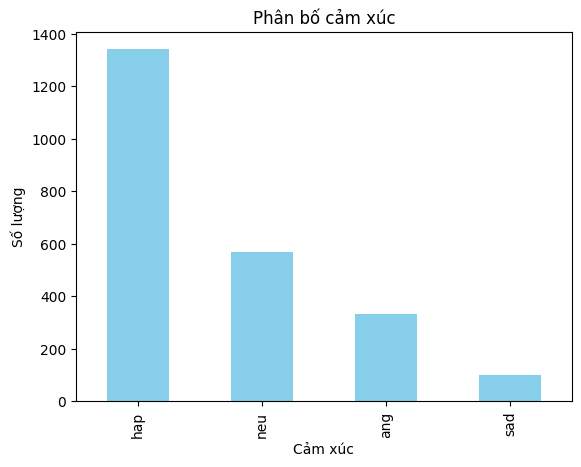

In [ ]:
import matplotlib.pyplot as plt

df['Emotion'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Phân bố cảm xúc')
plt.xlabel('Cảm xúc')
plt.ylabel('Số lượng')
plt.show()


In [ ]:
# Lưu cả mô hình và trọng số
model.save("/content/drive/My Drive/ser_model/ser_model.h5")


AttributeError: 'HubertForSequenceClassification' object has no attribute 'save'

In [ ]:
import zipfile
import os
import csv

# Đường dẫn file zip trên Google Drive
zip_path = "/content/drive/My Drive/ser_model/wav-public.zip"
extract_path = "/content/wav_files"

# Giải nén file zip
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Đã giải nén vào thư mục: {extract_path}")

# Lấy danh sách file wav
wav_paths = [os.path.join(extract_path, f)
             for f in os.listdir(extract_path) if f.lower().endswith(".wav")]

if len(wav_paths) == 0:
    raise SystemExit("❌ Không tìm thấy file .wav. Kiểm tra file zip.")

# Lấy 1 file mẫu để predict
sample = wav_paths[0]
print("🎯 Thử predict với:", sample)

# Kiểm tra xem hàm predict_emotion có tồn tại
if "predict_emotion" not in globals():
    raise SystemExit("❌ Hàm predict_emotion chưa được định nghĩa.")

try:
    res = predict_emotion(sample)
    print("📊 Kết quả predict_emotion(sample):", res)
except Exception as e:
    raise SystemExit(f"❌ Lỗi khi gọi predict_emotion: {repr(e)}")

# Lưu kết quả vào file TSV
tsv_path = "/content/predict_results.tsv"
with open(tsv_path, "w", newline="", encoding="utf-8") as tsvfile:
    writer = csv.writer(tsvfile, delimiter="\t")
    writer.writerow(["file_name", "emotion", "confidence"])
    writer.writerow([os.path.basename(sample), res[0], res[1]])

print(f"✅ Kết quả đã lưu vào: {tsv_path}")


✅ Đã giải nén vào thư mục: /content/wav_files


SystemExit: ❌ Không tìm thấy file .wav. Kiểm tra file zip.

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import pandas as pd
df = pd.read_csv("/content/results.tsv", sep="\t")
df.head()


,filename,emotion,confidence


In [ ]:
!head -n 10 /content/results.tsv


filename	emotion	confidence


In [ ]:
from google.colab import files
files.download("/content/results.tsv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os

# 1) Kiểm tra file zip có tồn tại ở Drive không
zip_path = "/content/drive/My Drive/ser_model/wav-public.zip"
print("zip exists:", os.path.exists(zip_path))

# 2) Kiểm tra thư mục extract (tất cả vị trí khả dĩ bạn dùng)
cands = ["/content/wav_public", "/content/wav_files", "/content/wav_files/wav", "/content/wav_public/wav", "/content/wav_files/Audio_Speech_Actors_01-24"]
for p in cands:
    print(p, "->", "exists" if os.path.exists(p) else "no")

# 3) Tìm tất cả file .wav trong toàn bộ /content để chắc chắn zip đã giải nén vào đâu
wav_paths = []
for root, dirs, files in os.walk("/content"):
    for f in files:
        if f.lower().endswith(".wav"):
            wav_paths.append(os.path.join(root, f))
print("Tìm thấy tổng:", len(wav_paths), "file .wav")
# in 20 file đầu nếu có
for p in wav_paths[:20]:
    print(p)


zip exists: True
/content/wav_public -> exists
/content/wav_files -> exists
/content/wav_files/wav -> exists
/content/wav_public/wav -> exists
/content/wav_files/Audio_Speech_Actors_01-24 -> no
Tìm thấy tổng: 4690 file .wav
/content/drive/MyDrive/ser_model/test.wav
/content/drive/MyDrive/ser_model/test1.wav
/content/wav_public/wav/vlsp2025_public_0561.wav
/content/wav_public/wav/vlsp2025_public_0137.wav
/content/wav_public/wav/vlsp2025_public_0888.wav
/content/wav_public/wav/vlsp2025_public_1341.wav
/content/wav_public/wav/vlsp2025_public_0206.wav
/content/wav_public/wav/vlsp2025_public_0815.wav
/content/wav_public/wav/vlsp2025_public_1299.wav
/content/wav_public/wav/vlsp2025_public_1034.wav
/content/wav_public/wav/vlsp2025_public_1133.wav
/content/wav_public/wav/vlsp2025_public_0405.wav
/content/wav_public/wav/vlsp2025_public_1859.wav
/content/wav_public/wav/vlsp2025_public_2226.wav
/content/wav_public/wav/vlsp2025_public_1524.wav
/content/wav_public/wav/vlsp2025_public_0652.wav
/cont

In [ ]:
# Lấy 1 file wav bất kỳ (thay bằng đường dẫn phù hợp nếu cần)
if len(wav_paths) == 0:
    raise SystemExit("Không tìm thấy file .wav. Kiểm tra bước giải nén.")
sample = wav_paths[0]
print("Thử predict với:", sample)

# Kiểm tra xem hàm predict_emotion có tồn tại
print("predict_emotion in globals:", "predict_emotion" in globals())

try:
    res = predict_emotion(sample)
    print("Kết quả predict_emotion(sample):", res)
except Exception as e:
    print("Lỗi khi gọi predict_emotion:", repr(e))


Thử predict với: /content/drive/MyDrive/ser_model/test.wav
predict_emotion in globals: True
Kết quả predict_emotion(sample): ('hap', 0.9822636246681213)
